<a href="https://colab.research.google.com/github/panchalaman/Datamining/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Objective and Scope

##Objective:
### To analyze and mine the Airbnb listings dataset to derive insights and predictive models that can help in better understanding and optimizing the hosting experience on Airbnb.

## Scope:


1.   Data Collection and preprocessing.
2.   Exploratory Data Analysis (EDA).
3.   Application of data mining techniques such as clustering, calssification, and association rule mining.
4.   Evaluation of the models.
5.   Presenting results and actionable recommendations.



## 2. Data Collection and Preprocessing:
  ## a. Data Collection
  ### Load the dataset for further analysis

In [2]:
import pandas as pd #importing pandas
#loading dataset from the github repository
data = pd.read_csv('https://raw.githubusercontent.com/panchalaman/Datamining/main/Inside%20Airbnb%20listings%20(1).csv')
print(data.head())

      id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name       neighbourhood_group             neighbourhood  \
0          Britta                    Pankow   Prenzlauer Berg Südwest   
1         Philipp                    Pankow   Prenzlauer Berg Südwest   
2  Chris + Oliver                    Pankow  Prenzlauer Berg Nordwest   
3            Rene  Friedrichshain-Kreuzberg     nördliche Luisenstadt   
4        Matthias                  Neukölln              Reuterstraße   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.53471   13.41810  Entire home/apt   83.0              63   
1  52.53269   13.418

## b. Data Preprocessing:
### b.1. Handling missing values:
  Identiy and handle the missing values to ensure the dataset is complete.

In [3]:
#Identify the missing values
print(data.isnull().sum())
#forward fill method
data.fillna(method='ffill', inplace = True)
#fill specific columns with mean/ median.
data['reviews_per_month'].fillna(data['reviews_per_month'].median(), inplace=True)
data['last_review'].fillna(data['last_review'].mode()[0], inplace=True)

id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             4962
minimum_nights                       0
number_of_reviews                    0
last_review                       3134
reviews_per_month                 3134
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           4965
dtype: int64


### b.2. Encoding Categorical Variables:
  Convert categorical variable into numerical values for machine learning algorithms.

In [4]:
#list of categorical columns to encode
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
#categorical variable to dummy/ indicator variables
data_encoded = pd.get_dummies(data, columns = categorical_cols, drop_first = True)
#display 5 rows
print(data_encoded.head())


      id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name  latitude  longitude  price  minimum_nights  \
0          Britta  52.53471   13.41810   83.0              63   
1         Philipp  52.53269   13.41805  180.0               6   
2  Chris + Oliver  52.54813   13.40366   70.0             150   
3            Rene  52.50312   13.43508   90.0              93   
4        Matthias  52.49419   13.42166   25.0              92   

   number_of_reviews last_review  ...  neighbourhood_Westend  \
0                148  2023-05-25  ...                  False   
1                  7  2020-01-04  ...                  False   
2       

### b.3. Standardizing or Normalizing Numerical Features:
#### Scale numerical features to ensure they contribute equally to the analysis.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#list of numerical features to be scaled
numerical_features = ['latitude', 'longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']
data_scaled = data_encoded.copy()
data_scaled[numerical_features] = scaler.fit_transform (data_scaled[numerical_features])
print(data_scaled.head())

      id                                           name  host_id  \
0   3176                Fabulous Flat in great Location     3718   
1   9991            Geourgeous flat - outstanding views    33852   
2  14325            Studio Apartment in Prenzlauer Berg    55531   
3  16644             In the Heart of Berlin - Kreuzberg    64696   
4  17904  Beautiful Kreuzberg studio - 3 months minimum    68997   

        host_name  latitude  longitude     price  minimum_nights  \
0          Britta  0.745133   0.228364 -0.343623        0.389456   
1         Philipp  0.685007   0.227610  0.402594       -0.674720   
2  Chris + Oliver  1.144579   0.010546 -0.443632        2.013726   
3            Rene -0.195145   0.484497 -0.289772        0.949549   
4        Matthias -0.460947   0.282064 -0.789815        0.930880   

   number_of_reviews last_review  ...  neighbourhood_Westend  \
0           1.293529  2023-05-25  ...                  False   
1          -0.359364  2020-01-04  ...                 

# 3. Exploratory Data Analysis (EDA):
#### Understand the dataset through visualisation and correlation analysis.

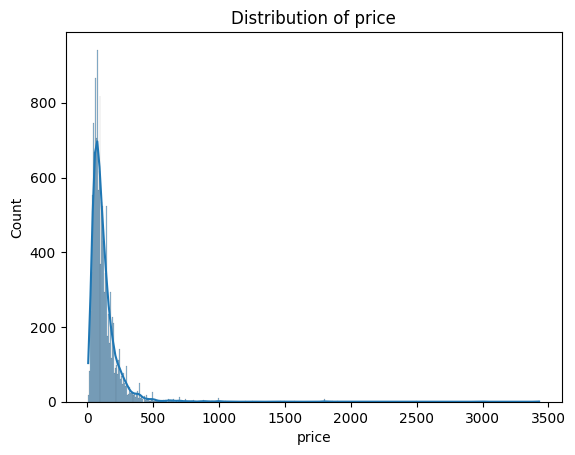

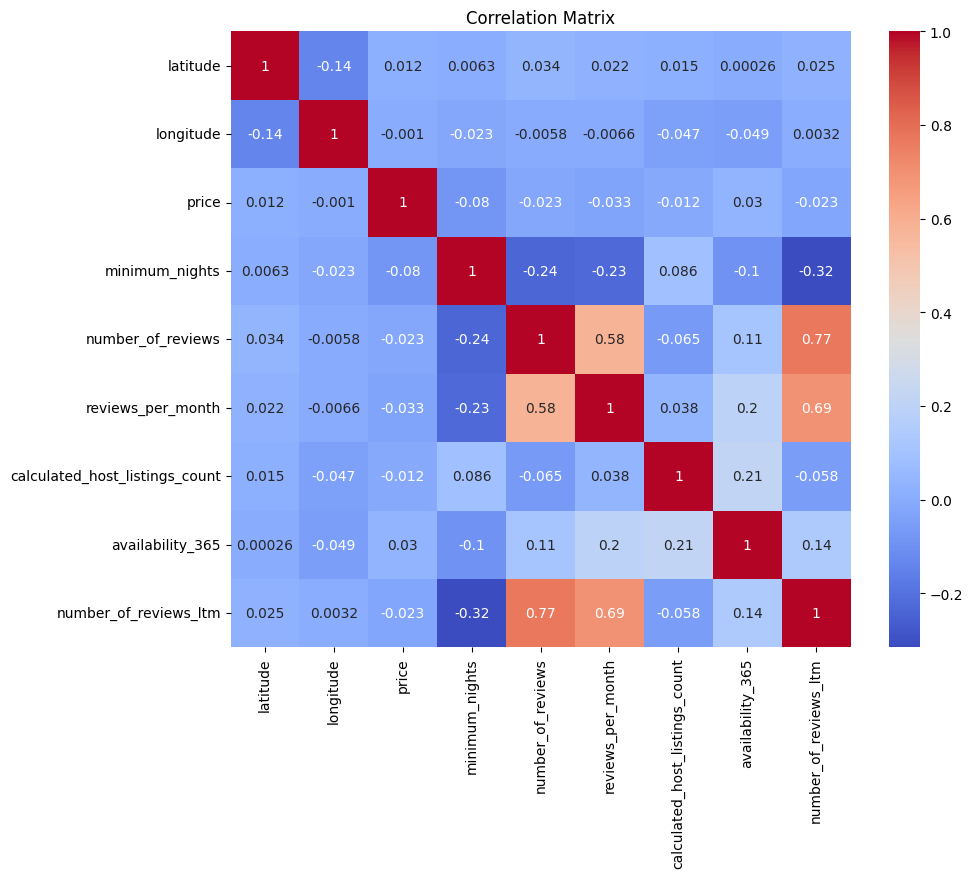

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot distribution of the 'price' feature
sns.histplot(data['price'],kde = True)
plt.title('Distribution of price')
plt.show()

# correlation heatmap ( considering numerical features only)
plt.figure(figsize = (10,8))
sns.heatmap(data_encoded[numerical_features].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Data Mining Techniques
  a. Clustering:  Identify clusters in the data for geographical and pricing strategies.
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


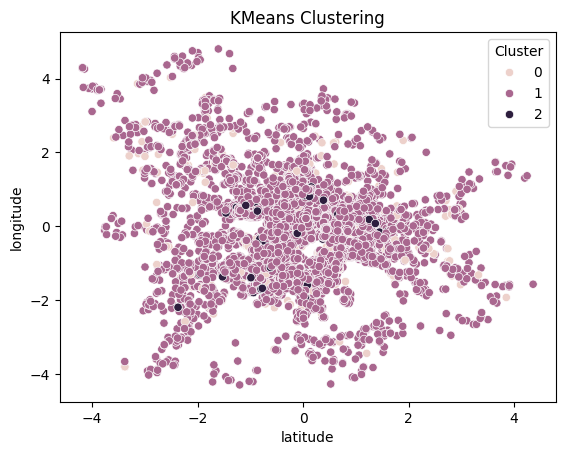

In [7]:
from sklearn.cluster import KMeans

# running KMeans clustering
kmeans = KMeans(n_clusters = 3, random_state = 42)
data_scaled['Cluster']= kmeans.fit_predict(data_scaled[numerical_features])

#visualise clustering results (eg. longitude and latitude)
sns.scatterplot(x ='latitude', y= 'longitude', hue = 'Cluster', data = data_scaled)
plt.title('KMeans Clustering')
plt.show()

#####b. Association Rule Mining:
#### Discover interesting relationships between different features of the dataset.
 ##### Including example problem for predicting 'room_type' ( Binary/ Multiclass problem)

In [51]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#check if 'room_type' exists in the data
if 'room_type' not in data.columns:
  raise ValueError ("'room_type' column not found in the data")

#encode 'room_type' if its categorical
le= LabelEncoder()
y=le.fit_transform(data['room_type'])

#feature matric preparation
X = data_scaled.drop(columns=['room_type_private_room_found_in_original_data_if_it_existed'],errors='ignore')

#identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features= X.select_dtypes(exclude=[np.number]).columns
#create preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
#creating pipeline with preprocessor and random forest
rf_pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 100, random_state=42))
])

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)
#fit the pipeline
rf_pipeline.fit(X_train, y_train)

#predict and evaluate
y_pred = rf_pipeline.predict(X_test)

#classification matrix
print("Classification Report: ")
print(classification_report(y_test, y_pred,target_names = le.classes_))

#confusion  matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Classification Report: 
                 precision    recall  f1-score   support

Entire home/apt       1.00      1.00      1.00      1773
     Hotel room       1.00      1.00      1.00        19
   Private room       1.00      1.00      1.00       847
    Shared room       1.00      1.00      1.00        34

       accuracy                           1.00      2673
      macro avg       1.00      1.00      1.00      2673
   weighted avg       1.00      1.00      1.00      2673

Confusion Matrix: 
[[1773    0    0    0]
 [   0   19    0    0]
 [   0    0  847    0]
 [   0    0    0   34]]


#### b.1 Feature Importance:

In [49]:
#feature importance
feature_names=(numeric_features.tolist()+
               rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())
feature_importance =pd.DataFrame({
    'feature': feature_names,
    'importance': rf_pipeline.named_steps['classifier'].feature_importances_})
print("\n Top 10 Important Features:")
print(feature_importance.sort_values('importance',ascending = False).head(10))


 Top 10 Important Features:
                              feature  importance
21681     room_type_Private room_True    0.264317
21680    room_type_Private room_False    0.257660
4                               price    0.034031
9                    availability_365    0.015075
5                      minimum_nights    0.013105
1                             host_id    0.011343
0                                  id    0.011100
7                   reviews_per_month    0.010918
8      calculated_host_listings_count    0.009986
21682     room_type_Shared room_False    0.009085


# 5. Evaluation:

#### a. Classification Evaluation:
####  Assesses the performance of the classification model

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#using label encoder for y_test if its categorical
if y_test.dtype =='object':
  le=LabelEncoder()
  y_test = le.fit_transform(y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average= 'weighted')
recall = recall_score(y_test,y_pred,average ='weighted')
f1= f1_score(y_test,y_pred,average = 'weighted')

print(f'Accuracy: {accuracy}')
print(f"Precision:{precision}")
print(f'Recall: {recall}')
print(f'F1 score: {f1}')


Accuracy: 1.0
Precision:1.0
Recall: 1.0
F1 score: 1.0


#### b. Clustering Evaluation:
#### Measure the quality of clusters formed.

In [69]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(data_scaled [numerical_features], data_scaled['Cluster'])
print(f"Silhouette Score: {s_score}")

Silhouette Score: 0.3486741618188636


# 6. Results and Recommendations:

##Findings:


1.   Geographical Clustering: Three distinct geographical clusters were identified.
2.   Room Type Prediction: The Random Forest model predicts room types based on demand prediction

##Recommendations:
1.  Marketing Strategy: Target specific marketing campaigns for each geopgraphical cluster.
2.  Dynamic Pricing: Implement dynamic pricing strategies based on precited demand.
3.  Optimizing Room Type: Increase or decrease the availability of certain room types based on demand prediction.




#7. Dataset and Repository Link:
  Dataset: https://insideairbnb.com/get-the-data/
  github repository link: https://github.com/panchalaman/Datamining/tree/main
